# initializing variables

## setting up file name

In [1]:
%ls ../2022_CENTURI-SummerSchool/datasets/dataset1_reaching-task/

ls: ../2022_CENTURI-SummerSchool/datasets/dataset1_reaching-task/: No such file or directory


https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html#scipy-io-loadmat

In [2]:
import os
path = '../datasets/dataset1_reaching-task/'
fname = os.path.join(path, 'Dataset1.mat')

## data loading

In [3]:
import numpy as np
from scipy.io import loadmat

In [4]:
DATA = loadmat(fname)

In [5]:
%whos

Variable   Type        Data/Info
--------------------------------
DATA       dict        n=5
fname      str         ../datasets/dataset1_reaching-task/Dataset1.mat
loadmat    function    <function loadmat at 0x1052a1e50>
np         module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
os         module      <module 'os' from '/usr/l<...>3.9/lib/python3.9/os.py'>
path       str         ../datasets/dataset1_reaching-task/


In [6]:
DATA.keys()

dict_keys(['__header__', '__version__', '__globals__', 'direction', 'R'])

In [7]:
DATA['direction'].shape

(158, 1)

In [8]:
DATA['R'].shape

(143, 158)

note: transposin to show each trial in different lines

In [9]:
direction = DATA['direction'] - 1
R = DATA['R'].T
direction, R[:, 0]

(array([[2],
        [4],
        [4],
        [1],
        [5],
        [2],
        [6],
        [3],
        [2],
        [3],
        [1],
        [0],
        [7],
        [4],
        [3],
        [1],
        [3],
        [6],
        [4],
        [1],
        [4],
        [0],
        [4],
        [3],
        [2],
        [5],
        [7],
        [0],
        [0],
        [2],
        [4],
        [6],
        [3],
        [0],
        [2],
        [6],
        [7],
        [4],
        [4],
        [1],
        [2],
        [6],
        [0],
        [7],
        [4],
        [2],
        [6],
        [3],
        [1],
        [4],
        [7],
        [7],
        [4],
        [6],
        [6],
        [3],
        [1],
        [5],
        [3],
        [5],
        [5],
        [4],
        [3],
        [2],
        [4],
        [5],
        [6],
        [7],
        [2],
        [3],
        [0],
        [7],
        [4],
        [2],
        [2],
        [0],
        [4],

In [10]:
np.unique(direction)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=uint8)

In [11]:
N_directions = len(np.unique(direction))
N_trials, N_neurons = R.shape
N_trials, N_neurons, N_directions

(158, 143, 8)

## visualisation

In [12]:
import matplotlib.pyplot as plt

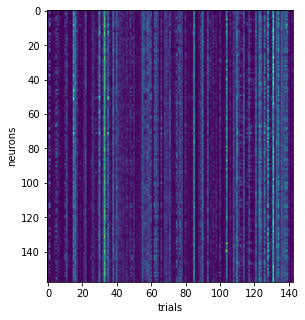

In [13]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.imshow(R)
ax.set_xlabel('trials')
ax.set_ylabel('neurons');

# basic stats

## firing rate statistics

In [14]:
import numpy as np

In [15]:
print(R.min(), R.mean(), R.max())

0.0 7.6930952509451185 61.07647283369306


In [16]:
fr_bins = np.linspace(0, 60, 40)

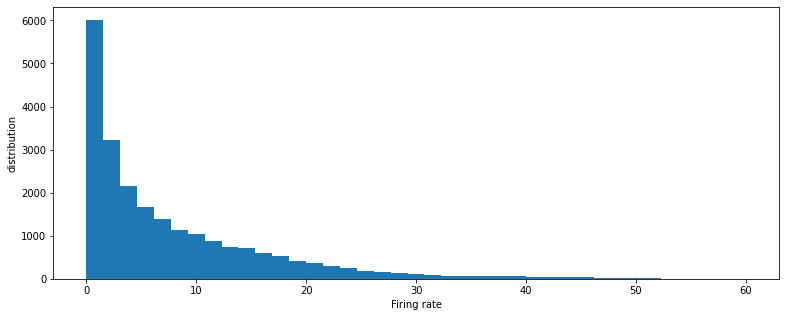

In [17]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.hist(R.ravel(), bins=fr_bins)
ax.set_xlabel('Firing rate')
ax.set_ylabel('distribution');

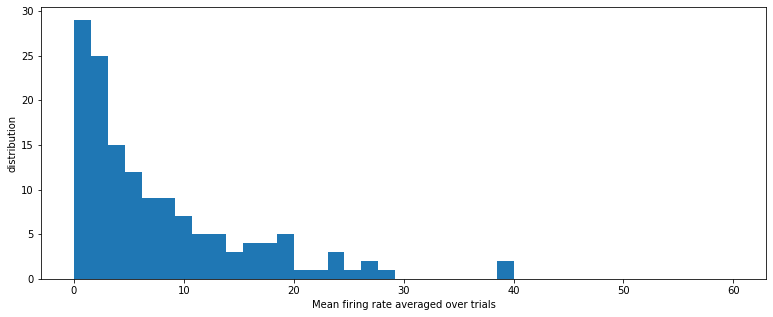

In [18]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.hist(R.mean(axis=0), bins=fr_bins)
ax.set_xlabel('Mean firing rate averaged over trials')
ax.set_ylabel('distribution');

In [19]:
R.mean(axis=1).min()

6.947771087761403

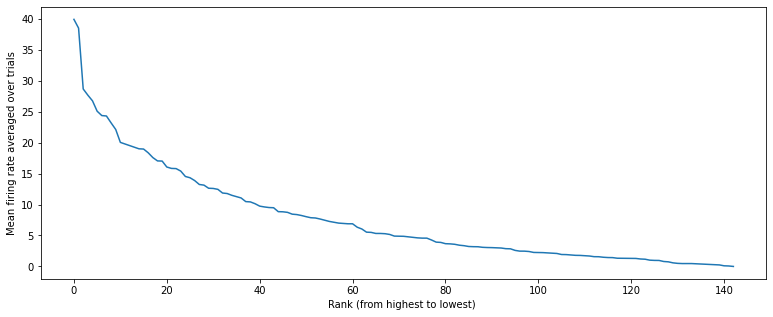

In [20]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(-np.sort(-R.mean(axis=0)))
ax.set_xlabel('Rank (from highest to lowest) ')
ax.set_ylabel('Mean firing rate averaged over trials');

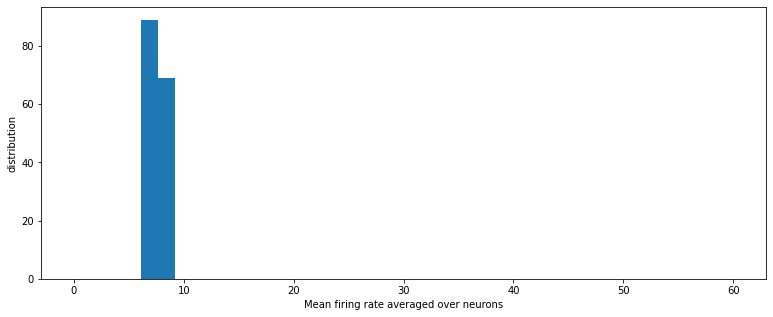

In [21]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.hist(R.mean(axis=1), bins=fr_bins)
ax.set_xlabel('Mean firing rate averaged over neurons')
ax.set_ylabel('distribution');

In [22]:
R.mean(axis=0).shape, R.shape

((143,), (158, 143))

/var/folders/3p/m0g52j9j69z3gj8ktpgg1dm00000gn/T/ipykernel_24568/574462537.py:2: RuntimeWarning: invalid value encountered in true_divide
  ax.hist(R.mean()*(R/R.mean(axis=0)[None, :]).ravel(), bins=fr_bins)


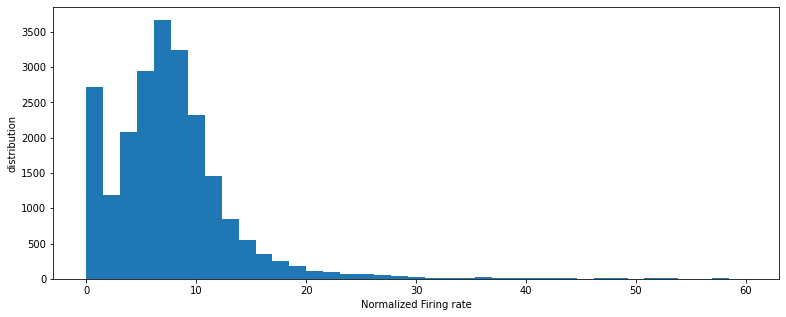

In [23]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.hist(R.mean()*(R/R.mean(axis=0)[None, :]).ravel(), bins=fr_bins)
ax.set_xlabel('Normalized Firing rate')
ax.set_ylabel('distribution');

## extracting firing rates per condition

In [24]:
R.mean(axis=1).shape

(158,)

In [25]:
R0 = R[:, 0] # selecting neuron #0

In [26]:
ind, _ = np.where(direction==1)
ind

array([  3,  10,  15,  19,  39,  48,  56, 103, 116, 117, 149, 153])

Averaging 

In [27]:
R0[np.where(direction==1)[0]]

array([3.04549977, 2.37016749, 1.01633763, 3.10596518, 1.96365064,
       2.87731144, 3.71800963, 0.        , 1.93827666, 2.33408543,
       4.5564141 , 1.13524559])

In one line

In [28]:
R0[np.where(direction==1)[0]].mean()

2.3384136293835485

In [29]:
np.where(direction==1)

(array([  3,  10,  15,  19,  39,  48,  56, 103, 116, 117, 149, 153]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [30]:
R[np.where(direction==1)[0], :].mean(axis=1).shape

(12,)

In [49]:
R_mean = np.zeros((N_neurons, N_directions))
for direction_ in range(N_directions):
    R_mean[:, direction_] = R[np.where(direction==direction_)[0], :].mean(axis=0)

In [50]:
R_mean[0, :]

array([3.71823604, 2.33841363, 0.94966148, 0.74470821, 0.51546053,
       0.61088455, 4.36236034, 5.23958888])

## projecting on the first PCA dimensions

In [128]:
from sklearn.decomposition import PCA
PCA?

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', default=None
    Number of components to keep.
    if n_componen

In [120]:
pca = PCA(n_components=10)
pca.fit(R.T)

PCA(n_components=10)

In [121]:
pca.explained_variance_

array([9826.43705282,  694.26093826,  190.56424197,  153.9703953 ,
         95.15042282,   74.27500112,   47.2152326 ,   43.08553345,
         40.7534246 ,   35.62669744])

In [122]:
direction.shape, pca.components_.shape

((158, 1), (10, 158))

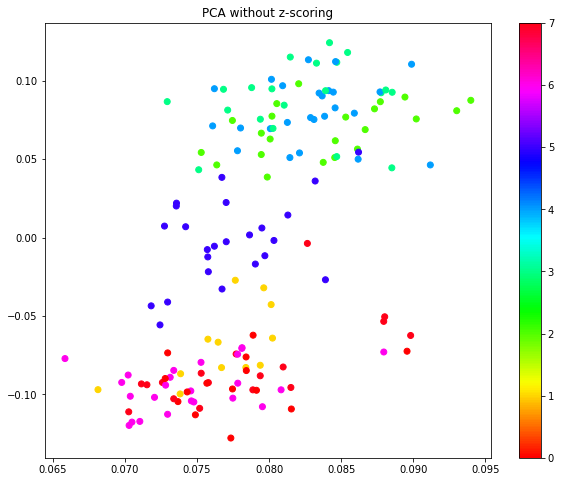

In [123]:
plt.figure(figsize=(10,8))
plt.scatter(pca.components_[0, :], 
            pca.components_[1, :], c=direction, 
            cmap='hsv')
plt.title('PCA without z-scoring')
plt.colorbar()

In [111]:
from sklearn.preprocessing import StandardScaler
StandardScaler?

Init signature: StandardScaler(*, copy=True, with_mean=True, with_std=True)
Docstring:     
Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample `x` is calculated as:

    z = (x - u) / s

where `u` is the mean of the training samples or zero if `with_mean=False`,
and `s` is the standard deviation of the training samples or one if
`with_std=False`.

Centering and scaling happen independently on each feature by computing
the relevant statistics on the samples in the training set. Mean and
standard deviation are then stored to be used on later data using
:meth:`transform`.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of
a learning algorithm (such as the RBF kernel of Suppor

In [124]:
scaler = StandardScaler()
scaler.fit(R.T)

StandardScaler()

In [126]:
zscore = scaler.fit_transform(R.T)

In [127]:
zscore.mean()

-2.594484186076315e-18

In [129]:
pca = PCA(n_components=10)
pca.fit(zscore)

PCA(n_components=10)

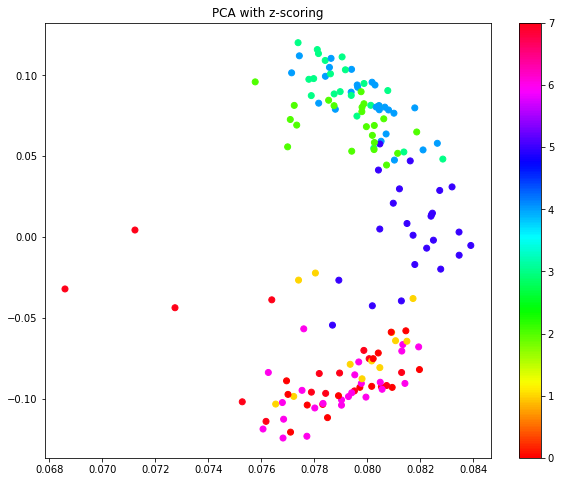

In [131]:
plt.figure(figsize=(10,8))
plt.scatter(pca.components_[0,:], pca.components_[1,:], c=direction, cmap='hsv')
plt.title('PCA with z-scoring')
plt.colorbar();

# tuning curves

In [51]:
R_mean.shape

(143, 8)

In [97]:
def tuning_function(x, mu, kappa, fmax, bsl):
    # Von Mises, with kappa the concentration, mu the location
    # fmax the firing rate at pref ori, bsl the min firing rate (not the baseline, which was substracted) 
    tf = bsl + np.exp(kappa*(np.cos(x-mu)-1)) * (fmax-bsl)
    return tf

In [62]:
theta = np.linspace(0, 2*np.pi, N_directions, endpoint=False)
tuning_function(theta, np.pi/4, 2., 20., 1.)

array([12.1333581 , 21.        , 12.1333581 ,  3.70670566,  1.65804544,
        1.36631278,  1.65804544,  3.70670566])

In [63]:
R_mean[0, :]

array([3.71823604, 2.33841363, 0.94966148, 0.74470821, 0.51546053,
       0.61088455, 4.36236034, 5.23958888])

More on https://gist.github.com/laurentperrinet/de76f53fcb0820844fbf0317ed832035#file-fit_vonmises-py

In [98]:
from lmfit import Model, Parameters

def fit_tc(array, init_kappa):
    x = np.linspace(0, 2*np.pi, len(array), endpoint=False)
    mod = Model(tuning_function)
    pars = Parameters()
    #               name    default           vary  min   max
    pars.add_many(('mu', x[np.argmax(array)], True, 0., 2*np.pi),
                  ('kappa', init_kappa, True,  .1, 5.),
                  ('fmax', np.max(array), True, 0.0, 2*np.max(array)+5),
                  ('bsl', np.min(array), True, 0.0, np.max(array)+5))
    out = mod.fit(array, pars, x=x, nan_policy='omit', max_nfev=50000)

    return out.best_values

In [99]:
p = fit_tc(R_mean[0, :], 3.5)
p

{'mu': 5.555491639771496,
 'kappa': 1.1592362734140085,
 'fmax': 5.402391948052349,
 'bsl': 1.6138612622867292e-07}

In [106]:
np.linspace(0, 360, N_directions, endpoint=False), np.linspace(0, 360, N_directions)


(array([  0.,  45.,  90., 135., 180., 225., 270., 315.]),
 array([  0.        ,  51.42857143, 102.85714286, 154.28571429,
        205.71428571, 257.14285714, 308.57142857, 360.        ]))

In [100]:
theta = np.linspace(0, 2*np.pi, N_directions, endpoint=False)
tuning_function(theta, **p)

array([4.02779619, 1.81205511, 0.78391129, 0.53275108, 0.71318951,
       1.58526182, 3.66442224, 5.39197818])

In [101]:
p['mu']

5.555491639771496

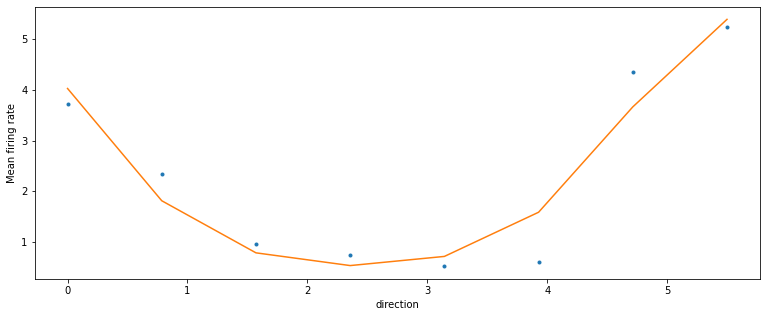

In [102]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(theta, R_mean[0, :] , '.')
ax.plot(theta, tuning_function(theta, **p))
ax.set_xlabel('direction')
ax.set_ylabel('Mean firing rate');

In [103]:
theta_more = np.linspace(0, 2*np.pi, 60, endpoint=False)


In [108]:
N_neurons//6

23

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


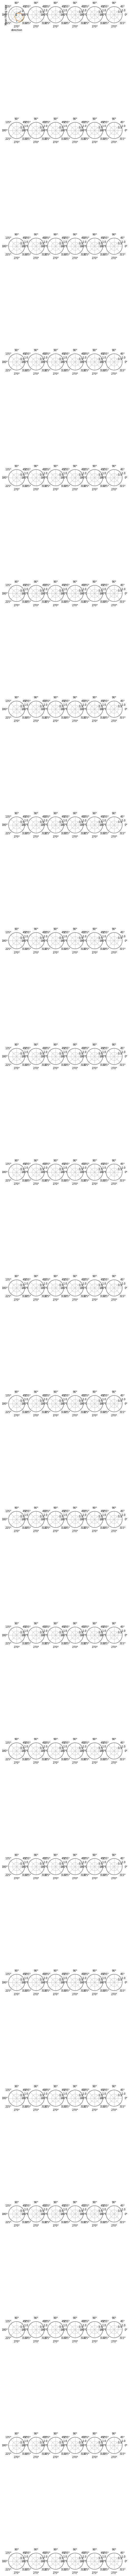

IndexError: index 23 is out of bounds for axis 0 with size 23

In [109]:
N_col = 6
fig, axs = plt.subplots(N_neurons//N_col, N_col, figsize=(8, 8*(N_neurons//N_col)), subplot_kw=dict(polar=True))
for i_neuron in range(N_neurons):
    ax = axs[i_neuron//6][i_neuron%6]
    p = fit_tc(R_mean[i_neuron, :], 1.5)
    ax.plot(theta, R_mean[i_neuron, :] , '.')
    ax.plot(theta_more, tuning_function(theta_more, **p))
    # ax.set_xlabel('direction')
    # ax.set_ylabel('Mean firing rate')
    ax.set_ylim(0)
